<a href="https://colab.research.google.com/github/Fisissist/Learning-College-Algebra-with-Python/blob/InProgress/Algebra08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intro to Pandas

Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io


Upload .csv file from computor

In [7]:
uploaded = files.upload()
file_name = next(iter(uploaded))
table_1 = pd.read_csv(io.BytesIO(uploaded[file_name]))


Saving Download_COVID_Vaccination_Data_By_Race_and_Ethnicity_3549940102528863773.csv to Download_COVID_Vaccination_Data_By_Race_and_Ethnicity_3549940102528863773.csv


Get .csv from a URL

In [6]:
"""url = "https://people.sc.fsu.edu/-jburkardt/data/csv/faithful.csv"
url doesn't work anymore
table_2  = pd.read_csv(url)"""

'url = "https://people.sc.fsu.edu/-jburkardt/data/csv/faithful.csv"\nurl doesn\'t work anymore\ntable_2  = pd.read_csv(url)'

Those imports and that url variable will be good for maybe 20 minutes, so you don't have to repeat those steps each time. Now determine what columns you want and convert them to numpy arrays.

In [27]:
# Could just display the whole table but may be too much.

print("1|≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈")

# Get the headers so you can see the col names and two rows
print(table_1.head())

print("\n2|≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈")

# col names as variable
col_names = table_1.columns

# or loop through col names
print("Column Names:")
for a in range(len(col_names)):
  print(f"{a} {col_names}")

print("\n3|≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈")

# one more way
print("Column Names:")
for col in col_names:
  print(col)

1|≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈
   OBJECTID  Id           Date_Updated Source  \
0         1   1  12/21/2023 5:00:00 AM    NRG   
1         2   2  12/21/2023 5:00:00 AM    NRG   
2         3   3  12/21/2023 5:00:00 AM    NRG   
3         4   4  12/21/2023 5:00:00 AM    NRG   
4         5   5  12/21/2023 5:00:00 AM    NRG   

                                Race   Count  Percent    Date_Str       Today  
0  American Indian or Alaskan Native     823     0.20  21-12-2023  2024-05-30  
1                              Asian   41498    10.01  21-12-2023  2024-05-30  
2          Black or African American   72481    17.48  21-12-2023  2024-05-30  
3                           Hispanic  196485    47.40  21-12-2023  2024-05-30  
4                       Multi-Racial    3471     0.84  21-12-2023  2024-05-30  

2|≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈
Column Names:
0 Index(['OBJECTID', 'Id', 'Date_Updated', 'Source', 'Race', 'Count', 'Percent',
       'Date_Str', 'Today'],
      dtype='o

Graph Index and one other column as `(x,y)` points

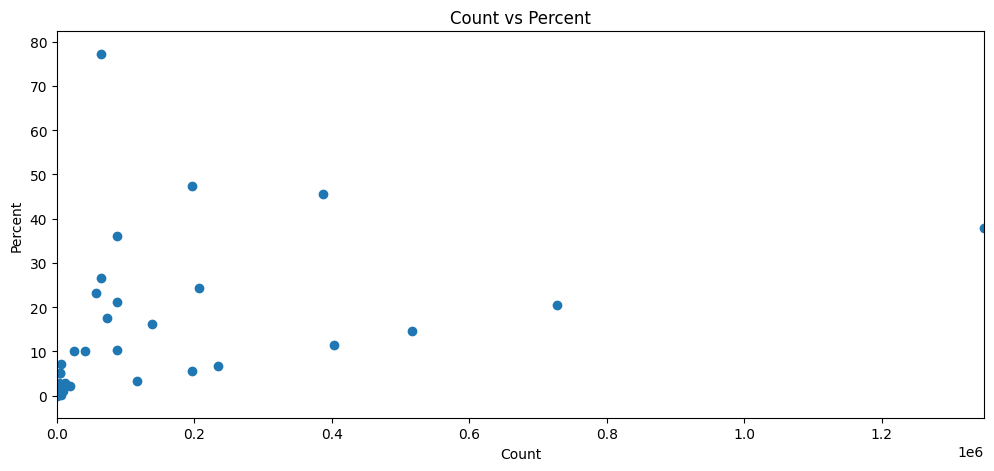

In [45]:
# convert values to numpy array
x = table_1["Count"].to_numpy()
y = table_1["Percent"].to_numpy()

#graph
xmin = x.min() - 5
xmax = x.max() + 5
ymin = y.min() - 5
ymax = y.max() + 5

fig, ax = plt.subplots()

fig.set_size_inches(10,5)
fig.tight_layout()
fig.subplots_adjust(top=0.85)

ax.set_title("Count vs Percent")
ax.set_xlabel("Count")
ax.set_ylabel("Percent")

ax.scatter(x,y)
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
plt.show()


#Using Metostat

Meteostat library for graphing weather data, may only need to install once

In [46]:
!pip install meteostat

Colums in lbrary:

time, tavg, tmin, tmax, prcp, snow, wdir, wspd, wpgt, pres, tsun

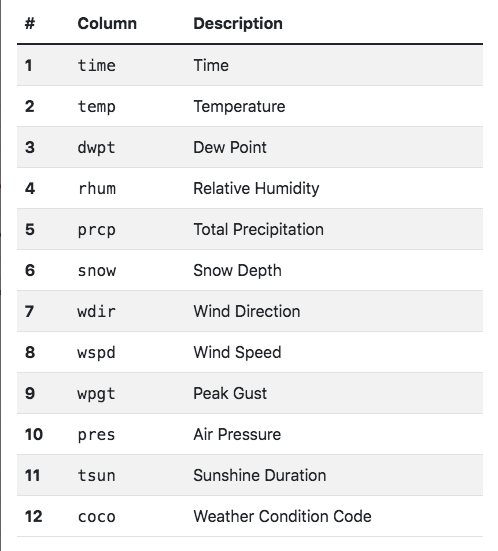

Change stat and end datetime

Point is (latitude, longitude, meters above the ground)

In [48]:
from numpy.core.fromnumeric import mean
#from metostat lib
from datetime import datetime
from meteostat import Point, Daily
import matplotlib.pyplot as plt
import numpy as np

Documentation: [https://meteostat.net/en/place/us/bellaire?s=877AW&t=2025-01-17/2025-01-24](https://)

City Mean = 14.125806451612904
Downtown Mean = 14.125806451612904
Mean Difference = 0.0


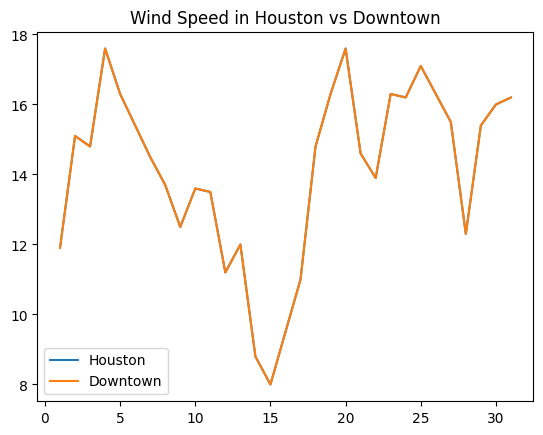

In [57]:
#Set time peroid
start = datetime(2022, 7, 1)
end = datetime(2022, 7, 31)

"""
Elevation: 22 m
Houston: 29.7058, -95.4588, Bellaire Blvd & W Loop S
Downtown: 29.754005, -95.362971, Four Seasons Hotel Houston, 1300 Lamar St, Houston, TX 77010, United States
"""
houston = Point(29.7058, -95.4588, 22)
downtown = Point(29.754005, -95.362971)

daily_data = Daily(houston, start, end)
my_data = daily_data.fetch()
num_data = my_data['wspd'].to_numpy()
print(f"City Mean = {mean(num_data)}")

daily_data2 = Daily(downtown, start, end)
my_data2 = daily_data2.fetch()
num_data2 = my_data2['wspd'].to_numpy()
print(f"Downtown Mean = {mean(num_data2)}")

print(f"Mean Difference = {(mean(num_data) - mean(num_data2))}")

# plot
x = np.linspace(1,31,31)

plt.title("Wind Speed in Houston vs Downtown")
plt.xlabel("Day")
plt.ylabel("Wind Speed (m/s)")

plt.plot(x, num_data, label="Houston")
plt.plot(x, num_data2, label="Downtown")

plt.legend()
plt.show()

Monthly loop

Month = 1 || Mean = 14.11 || Min = 4.10 || Max = 29.20


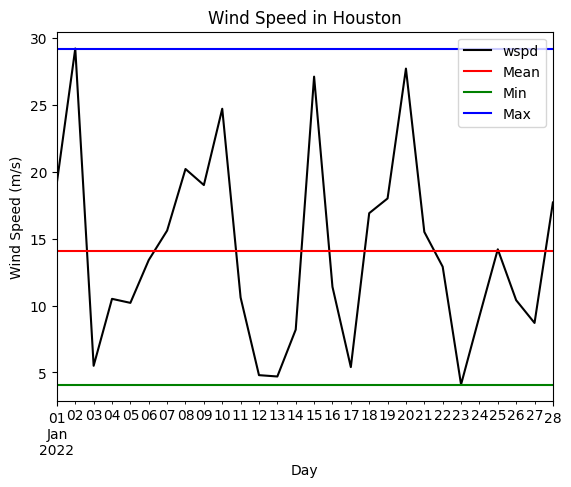

Month = 2 || Mean = 14.59 || Min = 5.60 || Max = 26.80


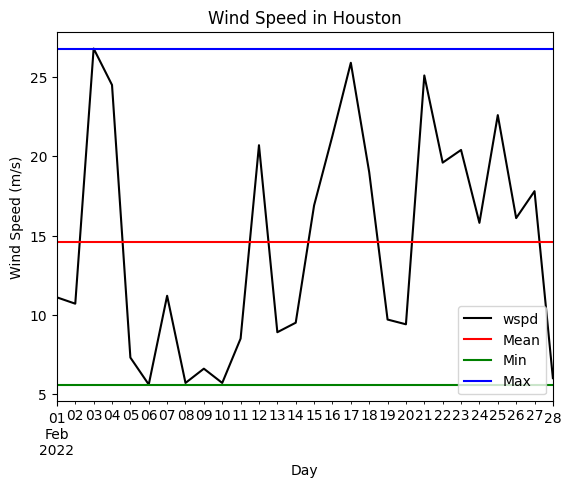

Month = 3 || Mean = 15.09 || Min = 4.80 || Max = 26.70


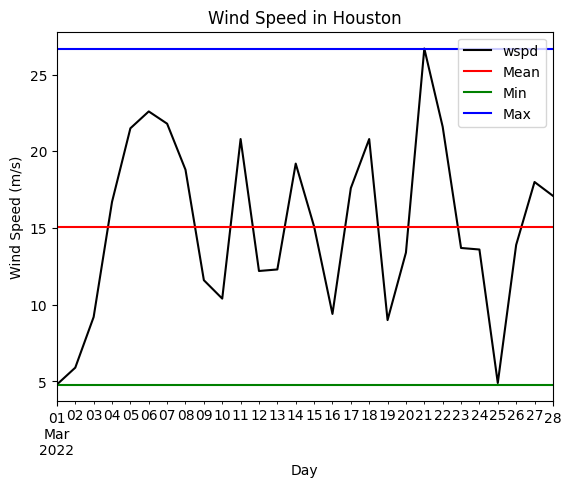

Month = 4 || Mean = 19.90 || Min = 7.90 || Max = 28.50


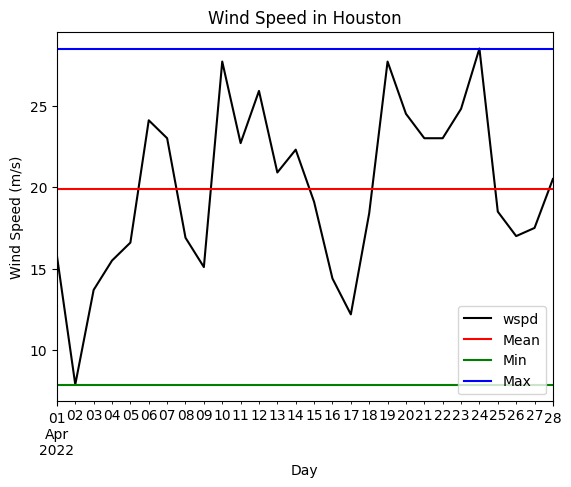

Month = 5 || Mean = 19.43 || Min = 11.90 || Max = 30.70


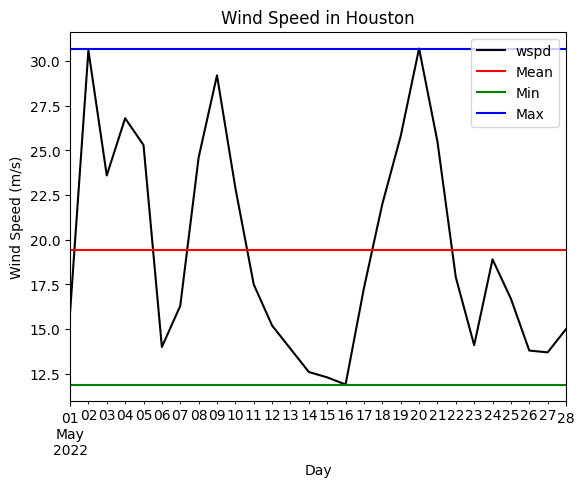

Month = 6 || Mean = 14.65 || Min = 9.90 || Max = 23.10


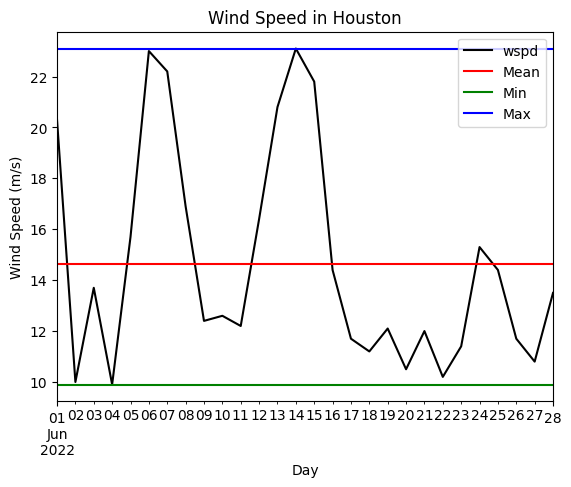

Month = 7 || Mean = 13.94 || Min = 8.00 || Max = 17.60


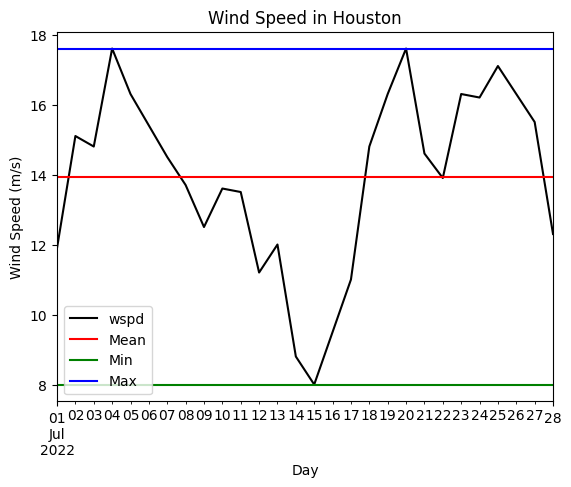

Month = 8 || Mean = 14.04 || Min = 9.10 || Max = 19.00


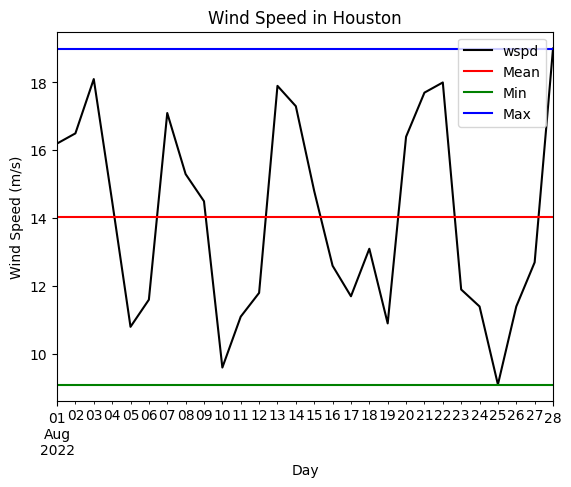

Month = 9 || Mean = 11.79 || Min = 7.70 || Max = 20.10


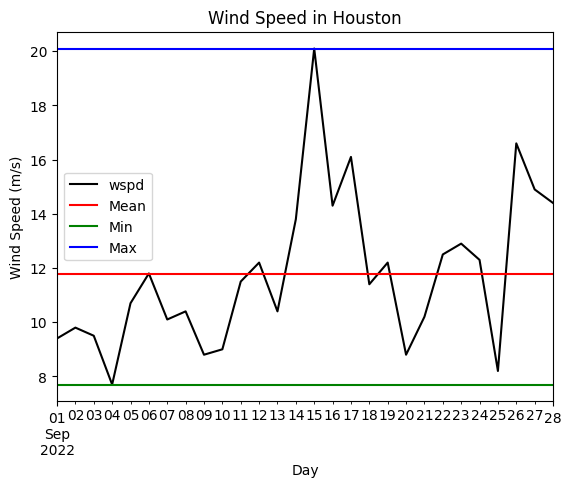

Month = 10 || Mean = 16.30 || Min = 10.40 || Max = 28.00


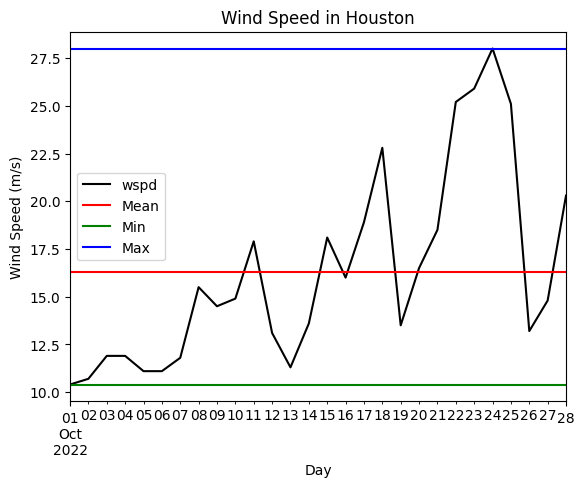

Month = 11 || Mean = 17.93 || Min = 11.00 || Max = 27.10


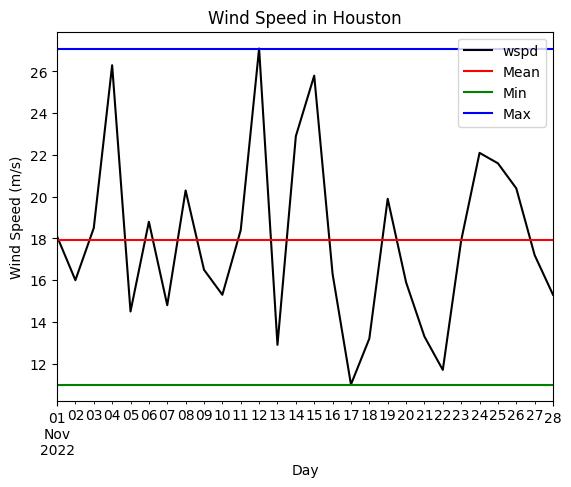

Month = 12 || Mean = 17.29 || Min = 8.50 || Max = 34.40


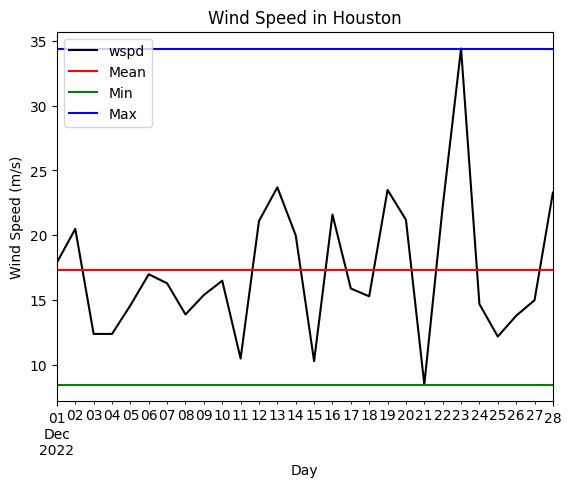

In [74]:
for m in range (1,13):
    #set time period
    start = datetime(2022, m, 1)
    end = datetime(2022, m, 28)

    #create point
    houston = Point(29.7058, -95.4588, 22)

    #get daily data for 2022
    daily_data = Daily(houston, start, end)
    my_data = daily_data.fetch()
    num_data = my_data['wspd'].to_numpy()
    print(f"Month = {m} || Mean = {mean(num_data):.02f} || Min = {min(num_data):.02f} || Max = {max(num_data):.02f}")

    #plot line chart including average, min, and max
    my_data.plot(y='wspd', color='k')

    plt.axhline(y=mean(num_data), color='r', linestyle='-', label='Mean')
    plt.axhline(y=min(num_data), color='g', label='Min')
    plt.axhline(y=max(num_data), color='b', label='Max')

    plt.title("Wind Speed in Houston")
    plt.xlabel("Day")
    plt.ylabel("Wind Speed (m/s)")

    plt.legend()
    plt.show()